In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
 
# Download NLTK stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
 
# Load your train, test, and validation datasets
# Replace 'train_data.csv', 'test_data.csv', 'validation_data.csv' with your dataset filenames
train_data = pd.read_csv(r'D:\Int Project\BASIC\Fake News basic\Fake_News_Detection-master\train.csv')
test_data = pd.read_csv(r'D:\Int Project\BASIC\Fake News basic\Fake_News_Detection-master\train.csv')
validation_data = pd.read_csv(r'D:\Int Project\BASIC\Fake News basic\Fake_News_Detection-master\train.csv')
 
# Concatenate all datasets into one
merged_data = pd.concat([train_data, test_data, validation_data], ignore_index=True)
 


In [2]:
merged_data.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


TF -IDF MATRIX

In [3]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    processed_text = ' '.join(filtered_tokens)
    return processed_text
 
# Apply preprocessing to the merged dataset
merged_data['processed_text'] = merged_data['Statement'].apply(preprocess_text)
 
# Split the merged data into features and labels
X = merged_data['processed_text']
y = merged_data['Label']
 
# Convert text data to numerical TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)
 
print("TF-IDF Matrix:")
print(X_tfidf.toarray())
 
# Print labels
print("Labels:")
print(y.to_numpy())

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
[False  True  True ...  True False False]


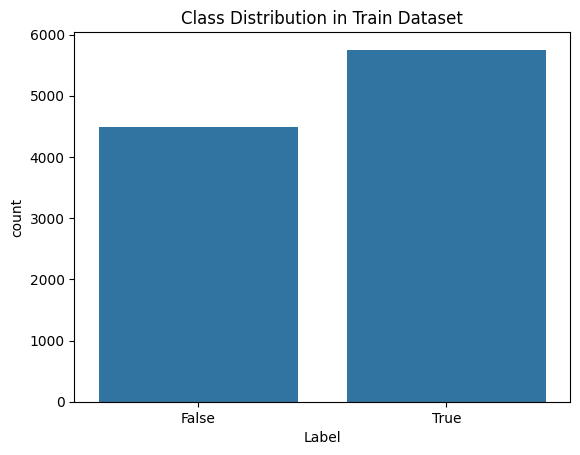

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label', data=train_data)
plt.title('Class Distribution in Train Dataset')
plt.show()

CONFUSION MATRIX


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
 
# Split the TF-IDF matrix back into train, test, and validation parts
X_train_tfidf = X_tfidf[:len(train_data)]
X_test_tfidf = X_tfidf[len(train_data):len(train_data) + len(test_data)]
X_val_tfidf = X_tfidf[len(train_data) + len(test_data):]
 
# Split the labels back into train, test, and validation parts
y_train = y[:len(train_data)]
y_test = y[len(train_data):len(train_data) + len(test_data)]
y_val = y[len(train_data) + len(test_data):]
 
# Initialize and train the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
 
# Validate the model
val_predictions = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")
 
# Test the model
test_predictions = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")
 
# Confusion Matrix
print("Confusion Matrix:")
conf = confusion_matrix(y_test, test_predictions)
print(conf)
 
# Precision and Recall
precision = precision_score(y_test, test_predictions, average='binary')
recall = recall_score(y_test, test_predictions, average='binary')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Validation Accuracy: 0.76201171875
Test Accuracy: 0.76201171875
Confusion Matrix:
[[2818 1670]
 [ 767 4985]]
Precision: 0.749060856498873
Recall: 0.8666550764951322


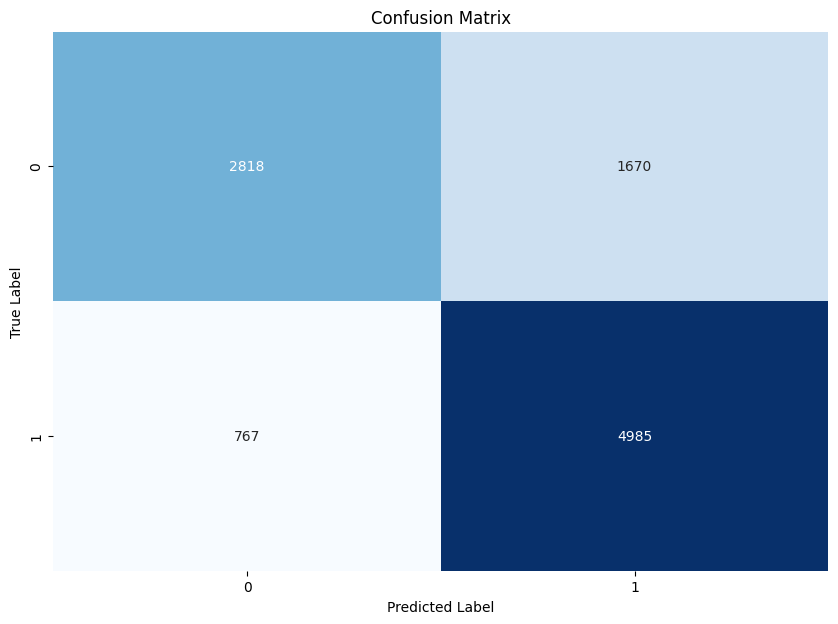

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='2d', cmap='Blues' , cbar= False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
 
# Initialize different classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
 
# Loop through each classifier
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train the model
clf.fit(X_train_tfidf, y_train)
    
    # Validation
val_predictions = clf.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"{clf_name} Validation Accuracy: {val_accuracy}")
 
    # Test
test_predictions = clf.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"{clf_name} Test Accuracy: {test_accuracy}") 
    # Confusion Matrix
print(f"{clf_name} Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
 
    # Precision and Recall
precision = precision_score(y_test, test_predictions, average='binary')
recall = recall_score(y_test, test_predictions, average='binary')
print(f"{clf_name} Precision: {precision}")
print(f"{clf_name} Recall: {recall}")
print("\n")

Training Naive Bayes...
Training SVM...
Training Random Forest...
Training Gradient Boosting...
Gradient Boosting Validation Accuracy: 0.64599609375
Gradient Boosting Test Accuracy: 0.64599609375
Gradient Boosting Confusion Matrix:
[[1213 3275]
 [ 350 5402]]
Gradient Boosting Precision: 0.6225654027889823
Gradient Boosting Recall: 0.9391515994436718


